In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier

In [5]:
raw_data = pd.read_csv('Present Bias Conditions DF_TargetLabelKmeans.csv')
raw_data = raw_data.dropna()


In [6]:
#Import standardization functions from scikit-learn
from sklearn.preprocessing import StandardScaler

#Standardize the data set
scaler = StandardScaler()
scaler.fit(raw_data.drop('Present Bias', axis=1))
scaled_features = scaler.transform(raw_data.drop('Present Bias', axis=1))
scaled_data = pd.DataFrame(scaled_features, columns = raw_data.drop('Present Bias', axis=1).columns)

In [7]:
#Split the data set into training data and test data
from sklearn.model_selection import train_test_split
x = scaled_data
y = raw_data['Present Bias']
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.25, random_state=1)

In [8]:
#Train the model and make predictions
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 1)
model.fit(x_training_data, y_training_data)
predictions = model.predict(x_test_data)

In [9]:
#Performance measurement
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test_data, predictions))
print(confusion_matrix(y_test_data, predictions))

              precision    recall  f1-score   support

           0       0.60      0.67      0.63         9
           1       0.92      0.89      0.91        38

    accuracy                           0.85        47
   macro avg       0.76      0.78      0.77        47
weighted avg       0.86      0.85      0.85        47

[[ 6  3]
 [ 4 34]]


In [10]:
#delete this cell percentages 

cf_matrix = confusion_matrix(y_test_data, predictions)

<AxesSubplot:>

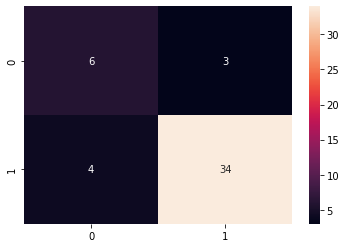

In [11]:
#delete this cell show only percentages 

import seaborn as sns
sns.heatmap(cf_matrix, annot = True)

<AxesSubplot:>

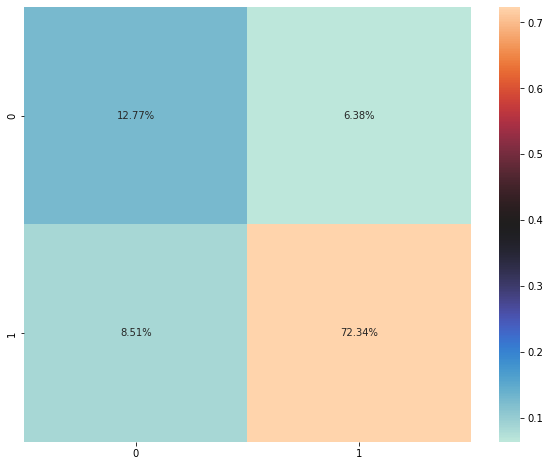

In [24]:
fig, ax = plt.subplots(figsize=(10,8))   

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='icefire', ax=ax )

In [ ]:
#Selecting an optimal K value
error_rates = []
for i in np.arange(1, 101):
    new_model = KNeighborsClassifier(n_neighbors = i)
    new_model.fit(x_training_data, y_training_data)
    new_predictions = new_model.predict(x_test_data)
    error_rates.append(np.mean(new_predictions != y_test_data))



In [ ]:
plt.figure(figsize=(16,12))
plt.plot(error_rates) # minimize error at k= 15